gmspy provides some preprocessing functions. Although they are not necessary, they may be useful in some situations.

In [1]:
import gmspy as gm
import matplotlib.pyplot as plt
import numpy as np

Below is the ground motion data built into gmspy, you can also document the PEER database through [loadPEER](/api/#gmspy.loadPEER), or you can read the data from text using [numpy.loadtxt](https://numpy.org/doc/stable/reference/generated/numpy.loadtxt.html).

In [2]:
ts, acc = gm.load_gm_examples("Kobe")
dt = ts[1] - ts[0]
# You can also use other acc data

## Baseline Correction

[![API](https://img.shields.io/badge/API-blue?style=flat-square&logo=python&logoColor=white) ](/api/#gmspy.baselinecorr)

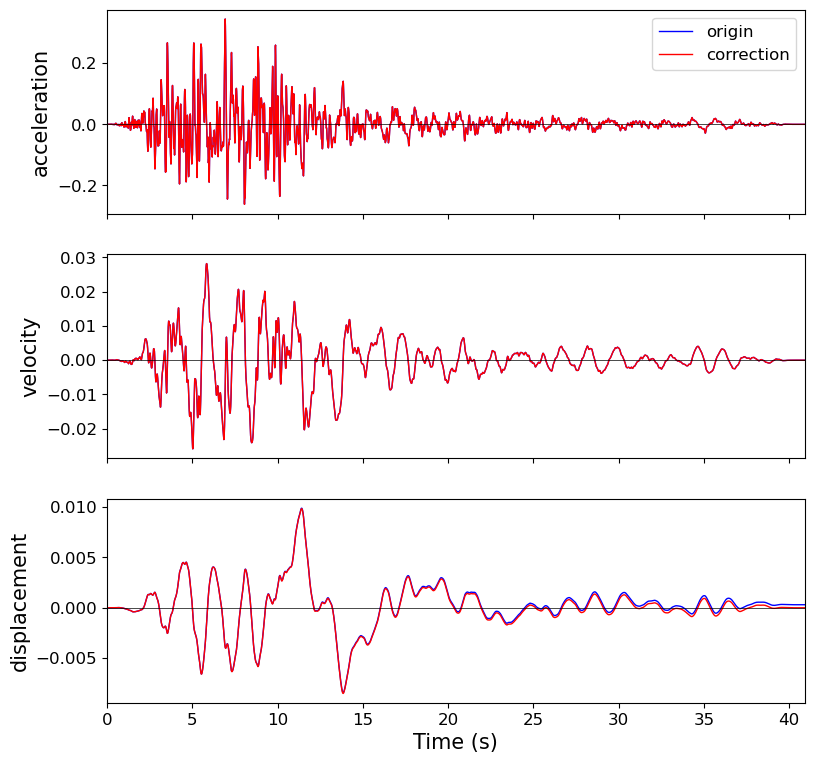

In [3]:
acc_corr, vel_corr, disp_corr = gm.baselinecorr(ts, acc, poly_degree=1, plot=True)

## Filtering

[![API](https://img.shields.io/badge/API-blue?style=flat-square&logo=python&logoColor=white) ](/api/#gmspy.freq_filt)

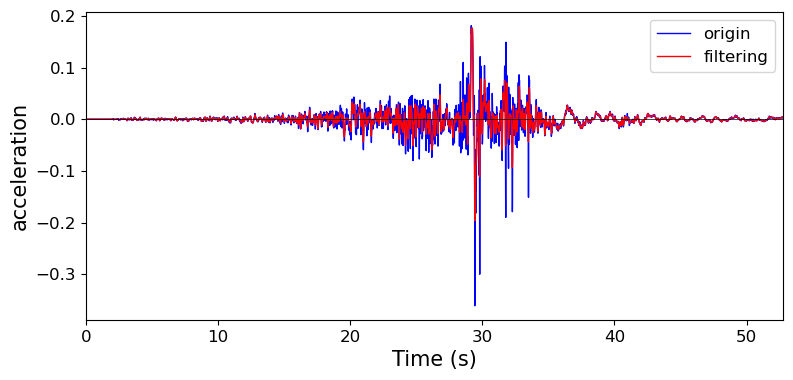

In [4]:
ts, acc = gm.load_gm_examples("ChiChi")
dt = ts[1] - ts[0]
acc2 = gm.freq_filt(
    dt,
    acc,
    ftype="Butterworth",  # 'Butterworth', 'Chebyshev', 'Bessel'
    btype="lowpass",  # 'lowpass', 'highpass', 'bandpass', 'bandstop'
    order=4,
    freq1=9,
    freq2=20,
    rp=3,
    plot=True,
)

## Resampling

[![API](https://img.shields.io/badge/API-blue?style=flat-square&logo=python&logoColor=white) ](/api/#gmspy.resample)

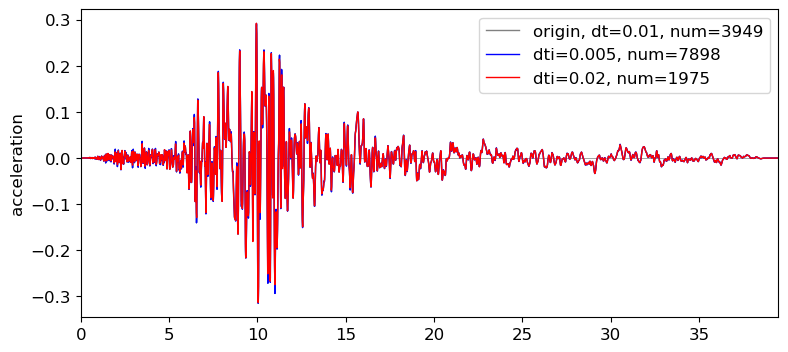

In [5]:
ts, acc = gm.load_gm_examples("Imperial_Valley")
dt = ts[1] - ts[0]
dtis = [dt / 2, 2 * dt]

colors = ["b", "r"]
fig, ax = plt.subplots(figsize=(9, 4))
ax.hlines(0, np.min(ts), np.max(ts), lw=0.5, colors="gray")
ax.plot(ts, acc, c="gray", lw=1, label=f"origin, dt={dt}, num={len(ts)}", alpha=1)
for i, dti in enumerate(dtis):
    ts2, acc2 = gm.resample(dt, acc, dti)
    ax.plot(ts2, acc2, c=colors[i], lw=1, alpha=1, label=f"dti={dti}, num={len(ts2)}")
ax.set_xlim(np.min(ts), np.max(ts))
ax.grid(False)
ax.set_ylabel("acceleration", fontsize=12)
ax.tick_params(labelsize=12)
ax.legend(fontsize=12)
plt.show()